In [1]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

**Image Augmentation**


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [18]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [19]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [20]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


**Create Model**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

**Add Layers**

In [23]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

**Compile The Model**

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Fit The Model**

In [25]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
44/44 [==============================] - 40s 892ms/step - loss: 1.7125 - accuracy: 0.3861 - val_loss: 1.1368 - val_accuracy: 0.5351
Epoch 2/20
44/44 [==============================] - 39s 879ms/step - loss: 1.0750 - accuracy: 0.5578 - val_loss: 0.9498 - val_accuracy: 0.6375
Epoch 3/20
44/44 [==============================] - 40s 916ms/step - loss: 0.8931 - accuracy: 0.6620 - val_loss: 0.8547 - val_accuracy: 0.6613
Epoch 4/20
44/44 [==============================] - 38s 875ms/step - loss: 0.7353 - accuracy: 0.7424 - val_loss: 0.5564 - val_accuracy: 0.8341
Epoch 5/20
44/44 [==============================] - 38s 876ms/step - loss: 0.5380 - accuracy: 0.8226 - val_loss: 0.4255 - val_accuracy: 0.8696
Epoch 6/20
44/44 [==============================] - 38s 876ms/step - loss: 0.3936 - accuracy: 0.8798 - val_loss: 0.2933 - val_accuracy: 0.9104
Epoch 7/20
44/44 [==============================] - 39s 879ms/step - loss: 0.2549 - accuracy: 0.9305 - val_loss: 0.1638 - val_accuracy: 0.9673

**Save The model**

In [27]:
model.save('flowers.h5')

**Testing Model**

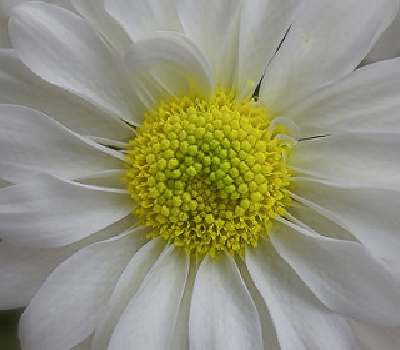

In [28]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(350,400))
img

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[141., 141., 139.],
        [148., 148., 150.],
        [152., 151., 156.],
        ...,
        [164., 163., 168.],
        [154., 154., 152.],
        [153., 153., 153.]],

       [[136., 135., 131.],
        [147., 147., 145.],
        [172., 171., 177.],
        ...,
        [160., 159., 164.],
        [155., 155., 153.],
        [149., 149., 149.]],

       [[125., 125., 117.],
        [138., 139., 134.],
        [157., 157., 159.],
        ...,
        [156., 156., 158.],
        [157., 157., 155.],
        [143., 142., 140.]],

       ...,

       [[ 41.,  44.,  23.],
        [ 43.,  46.,  25.],
        [ 55.,  57.,  46.],
        ...,
        [128., 124., 123.],
        [125., 121., 118.],
        [125., 122., 117.]],

       [[ 43.,  46.,  25.],
        [ 45.,  47.,  25.],
        [ 57.,  58.,  42.],
        ...,
        [132., 128., 127.],
        [129., 125., 124.],
        [127., 123., 122.]],

       [[ 44.,  47.,  26.],
        [ 47.,  48.,  30.],
        [ 55.,  